<a href="https://colab.research.google.com/github/the-cryptozoologist/data-science/blob/main/entropy/entropy-of-written-english-french-finnish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entropy of written English

Entropy in information theory: unpredictable things convey more information.



In [197]:
# Imports

from google.colab import drive

import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
%matplotlib inline

import requests
import re

In [380]:
# Import Anthony and Cleopatra (English)

link_eng = requests.get("https://www.gutenberg.org/cache/epub/1534/pg1534.txt")
raw_eng = link_eng.text
raw_eng[:1000]

'\ufeffThe Project Gutenberg eBook of Antony and Cleopatra, by William Shakespeare\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: Antony and Cleopatra\r\n\r\nAuthor: William Shakespeare\r\n\r\nRelease Date: November, 1998 [eBook #1534]\r\n[Most recently updated: November 18, 2021]\r\n\r\nLanguage: English\r\n\r\n\r\nProduced by: the PG Shakespeare Team, a team of about twenty Project Gutenberg volunteers.\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK ANTONY AND CLEOPATRA ***\r\n\r\n[Illustration]\r\n\r\n\r\n\r\n\r\nANTONY AND CLEOPATRA\r\n\r\n\r\nby William

In [199]:
# Patterns to be replaced

replace = ["\r\n\r\nâ\x80\x9c", # paragraph
           "â\x80\x9c",         # open quote
           "â\x80\x9d",         # close quote
           "\r\n",              # new line
           "â\x80\x94",         # hyphen
           "â\x80\x99",         # single apostrophe
           "â\x80\x98",         # single quote
           "_",                 # underscore, stressing
           "\'",                # ??
           "\ufeff",             # ??
           "—"
           ]

In [200]:
# Replace patterns

for r in replace:
  regexp = re.compile(r"%s"%replace)

  txt_eng = regexp.sub(" ", raw_eng)

regex_gen = re.compile(r"LieutenantGeneral")
regex_gut = re.compile(r"wwwgutenbergorg")

txt_eng = regex_gen.sub("Lieutenant General", txt_eng)
txt_eng = regex_gut.sub(" ", txt_eng)

In [381]:
txt_eng[:1000]

' The Project Gutenberg eBook of Antony and Cleopatra  by William Shakespeare    This eBook is for the use of anyone anywhere in the United States and  most other parts of the world at no cost and with almost no restrictions  whatsoever. You may copy it  give it away or re-use it under the terms  of the Project Gutenberg License included with this eBook or online at  www.gutenberg.org. If you are not located in the United States  you  will have to check the laws of the country where you are located before  using this eBook.    Title: Antony and Cleopatra    Author: William Shakespeare    Release Date: November  1998 [eBook #1534]  [Most recently updated: November 18  2021]    Language: English      Produced by: the PG Shakespeare Team  a team of about twenty Project Gutenberg volunteers.    *** START OF THE PROJECT GUTENBERG EBOOK ANTONY AND CLEOPATRA ***    [Illustration]          ANTONY AND CLEOPATRA      by William Shakespeare      Contents    ACT I  Scene I.  Alexandria. A Room in 

In [202]:
# Change case and split text into words

words_eng = txt_eng.lower().split()

In [383]:
words_eng[:10]

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'antony',
 'and',
 'cleopatra',
 'by',
 'william']

In [205]:
# Punctuation removal function

def remove_punc(string):
  punc = "'!()-[]|{};:.ï»¿“”’<>?@^*$\"0123456789="
  for s in string:
    if s in punc:
      string = string.replace(s, "")
  return string

In [384]:
# Remove punctuation from words

clean_eng = [remove_punc(i) for i in words_eng]

clean_eng[:10]

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'antony',
 'and',
 'cleopatra',
 'by',
 'william']

In [207]:
print(len(clean_eng))

30200


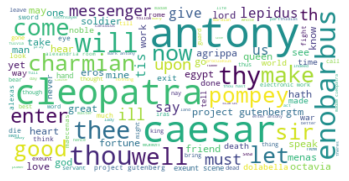

In [208]:
# WordCloud

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

clean_eng_txt = " ".join(clean_eng)

wordcloud = WordCloud(max_font_size=50, background_color="white").generate(clean_eng_txt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [211]:
# Count unique words

from collections import Counter

c_eng = Counter(clean_eng)

word_counter_eng = pd.DataFrame.from_records(list(dict(c_eng).items()), columns=["Word","Count"])

word_counter_eng.sort_values(by=["Count"])

,Word,Count
4368,newsletter,1
1763,perfume,1
1764,hits,1
3069,sealike,1
1766,adjacent,1
...,...,...
80,i,559
4,of,586
51,to,657
6,and,739


In [212]:
word_count_eng = list(word_counter_eng["Count"])

In [213]:
# Calculate word probability

word_prob_eng = []
for i in range(0,len(word_count_eng)):
  word_prob_eng.append(word_count_eng[i]/sum(word_count_eng))

In [214]:
# Word entropy

word_entropy_eng = -sum(word_prob_eng * np.log2(word_prob_eng))
word_entropy_eng

9.39461044072294

In [215]:
# Create DataFrame from words

eng = pd.DataFrame (clean_eng, columns = ["Word"])
eng

,Word
0,the
1,project
2,gutenberg
3,ebook
4,of
...,...
30195,to
30196,hear
30197,about
30198,new


In [216]:
# Add word lengths

eng["Length"]  = eng["Word"].str.len()

In [217]:
# Check for errors (optional)

eng.sort_values(by=["Length"]).head(-3)

,Word,Length
16898,,0
15031,,0
15029,,0
18081,,0
29175,,0
...,...,...
29419,unenforceability,16
535,lieutenantgeneral,17
539,lieutenantgeneral,17
27615,trademark/copyright,19


In [218]:
# Remove errors

len_count_eng = eng["Length"].value_counts().drop([0,17,19,22,23])
len_count_eng.sort_index()

1     1199
2     4851
3     5914
4     6238
5     3717
6     3002
7     1886
8     1146
9     1120
10     463
11     201
12      59
13      19
14      12
15      10
16       1
Name: Length, dtype: int64

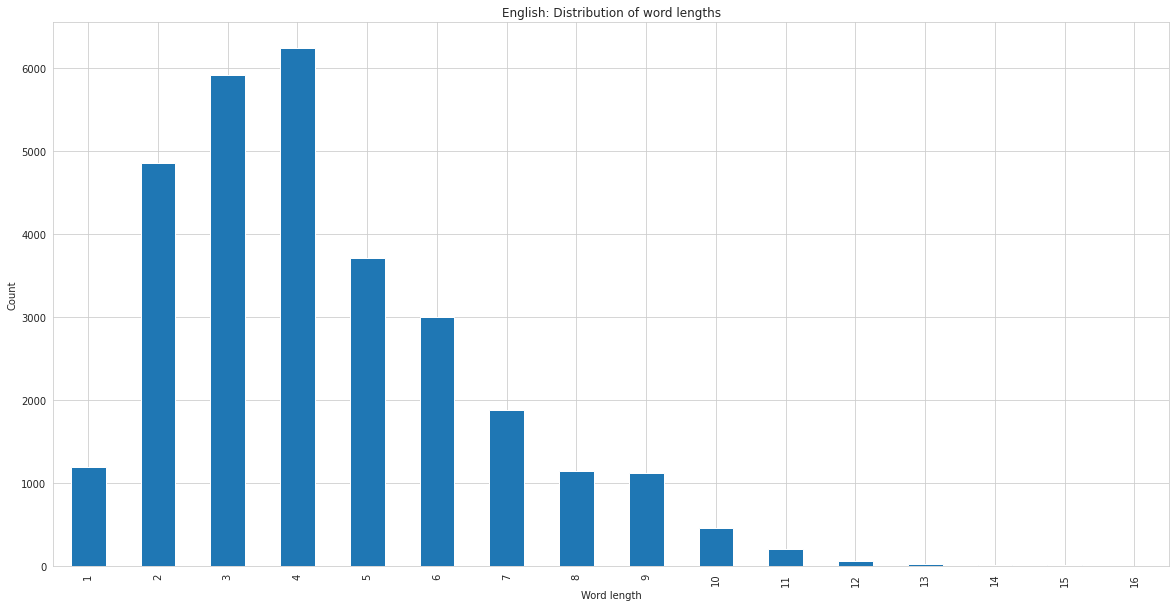

In [219]:
# Distribution of word lengths

plt.figure(figsize=(20,10))
len_count_eng.sort_index().plot(kind="bar")
plt.xlabel("Word length")
plt.ylabel("Count")
plt.title("English: Distribution of word lengths")
plt.show()

In [220]:
# Count letters

alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
letter_counter_eng = []

for i in range(0,26):
    letter_counter_eng.append(txt_eng.lower().count(alphabet[i]))

In [221]:
# Add letter frequency to new DataFrame

eng2 = pd.DataFrame (alphabet, columns = ["Letter"])
eng2["Frequency"] = letter_counter_eng

eng2

,Letter,Frequency
0,a,11155
1,b,2073
2,c,3448
3,d,4855
4,e,16133
5,f,2456
6,g,2299
7,h,7465
8,i,8217
9,j,163


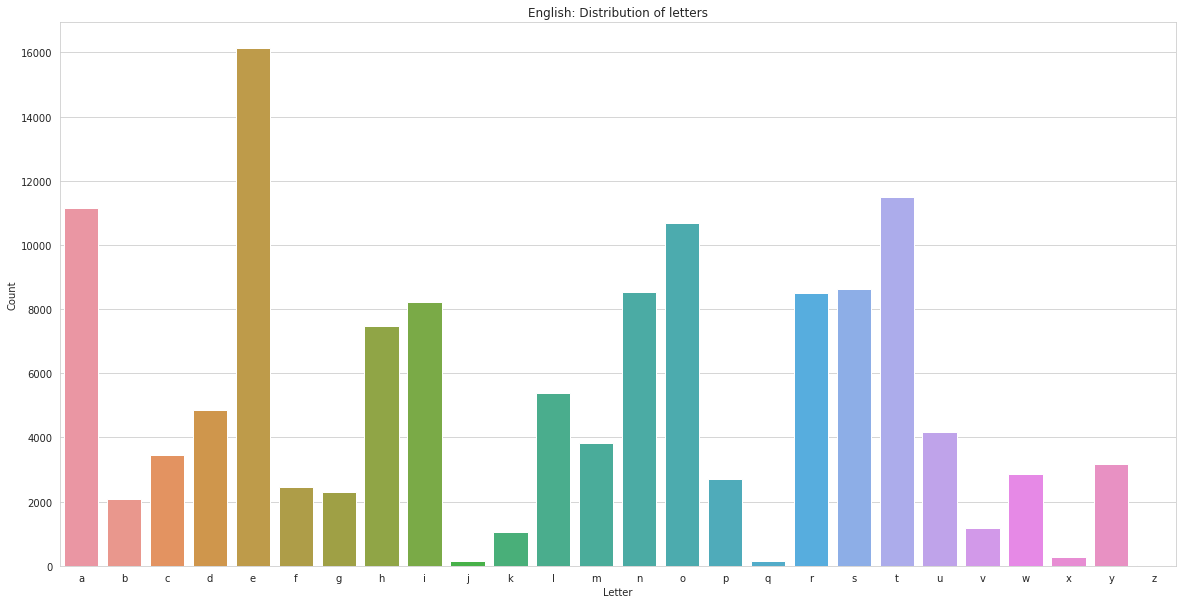

In [222]:
# Distribution of letters

plt.figure(figsize=(20,10))
sns.barplot(x="Letter", y="Frequency", data=eng2)
plt.xlabel("Letter")
plt.ylabel("Count")
plt.title("English: Distribution of letters")
plt.show()

In [223]:
# Calculate letter probability

letter_prob_eng = []
for i in range(0,len(alphabet)):
  letter_prob_eng.append(letter_counter_eng[i] / sum(letter_counter_eng))

In [224]:
# Add probability to DataFrame

eng2["Probability"] = letter_prob_eng
eng2

,Letter,Frequency,Probability
0,a,11155,0.085217
1,b,2073,0.015836
2,c,3448,0.026341
3,d,4855,0.037089
4,e,16133,0.123246
5,f,2456,0.018762
6,g,2299,0.017563
7,h,7465,0.057028
8,i,8217,0.062773
9,j,163,0.001245


In [225]:
# Calculate entropy

entropy_eng = -sum(letter_prob_eng * np.log2(letter_prob_eng))
entropy_eng

4.179898941773552

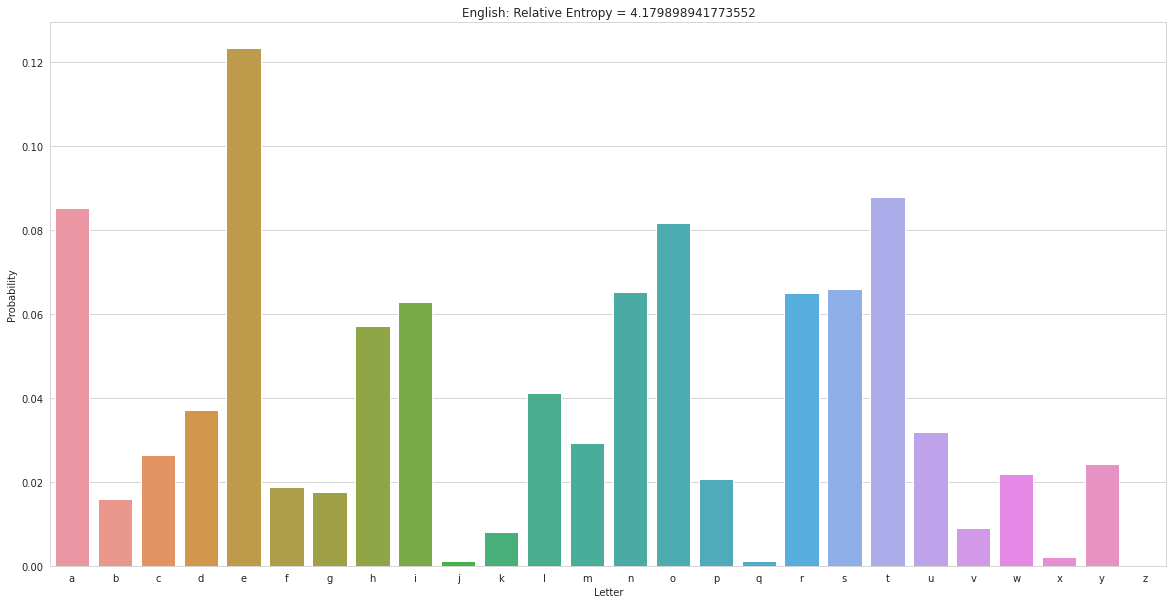

In [226]:
# Letter probability

plt.figure(figsize=(20,10))
sns.barplot(x="Letter", y="Probability", data=eng2)
plt.xlabel("Letter")
plt.ylabel("Probability")
plt.title(f"English: Relative Entropy = {entropy_eng}")
plt.show()

# Entropy of written French

In [385]:
# Get Antoine et Cléopâtre

link_fr = requests.get("https://www.gutenberg.org/cache/epub/15942/pg15942.txt")
raw_fr = link_fr.text
raw_fr[:1000]

'\ufeffThe Project Gutenberg eBook of Antoine et Cléopâtre, by William Shakespeare\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: Antoine et Cléopâtre\r\n\r\nAuthor: William Shakespeare\r\n\r\nTranslator: François Pierre Guillaume Guizot\r\n\r\nRelease Date: May 30, 2005 [eBook #15942]\r\n[Most recently updated: October 23, 2021]\r\n\r\nLanguage: French\r\n\r\n\r\nProduced by: Paul Murray, Renald Levesque and the Online Distributed Proofreading Team\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK ANTOINE ET CLÉOPÂTRE ***\r\n\r\n\r\n\r\n\r\nNote du transcripte

In [393]:
# Check where the english text ends

raw_fr[1000:2000]

"=============\r\n  Ce document est tiré de:\r\n\r\n  OEUVRES COMPLÈTES DE\r\n  SHAKSPEARE\r\n\r\n  TRADUCTION DE\r\n  M. GUIZOT\r\n\r\n  NOUVELLE ÉDITION ENTIÈREMENT REVUE\r\n  AVEC UNE ÉTUDE SUR SHAKSPEARE\r\n  DES NOTICES SUR CHAQUE PIÈCE ET DES NOTES\r\n\r\n  Volume 2\r\n  Jules César.\r\n  Cléopâtre. — Macbeth. — Les Méprises.\r\n  Beaucoup de bruit pour rien.\r\n\r\n  PARIS\r\n  A LA LIBRAIRIE ACADÉMIQUE\r\n  DIDIER ET Ce, LIBRAIRES-ÉDITEURS\r\n  35, QUAI DES AUGUSTINS\r\n  1864\r\n\r\n\r\n======================================================================\r\n\r\nANTOINE\r\nET\r\nCLÉOPÂTRE\r\n\r\n\r\nTRAGÉDIE\r\n\r\n\r\n\r\nNOTICE SUR ANTOINE ET CLÉOPÂTRE\r\n\r\n\r\nOn critiquera sans doute, dans cette pièce, le peu de liaison des\r\nscènes entre elles, défaut qui tient à la difficulté de rassembler une\r\nsuccession rapide et variée d'évènements dans un même tableau; mais\r\ncette variété et ce désordre apparent tiennent la curiosité toujours\r\néveillée, et un intérêt toujou

In [386]:
# Patterns to be replaced

init_replace = r"\'"

regexp_ini = re.compile(init_replace)

txt_fr = regexp_ini.sub("'", raw_fr[1000:-18760]) 

replace_fr = ["\ufeff",
              "--",
              "\r\n",
              "\r\n\r\n",
              "\r\n\r\n\r\n"
              "\r\n\r\n\r\n\r\n"
             ]
txt_fr[:1000]

"=============\r\n  Ce document est tiré de:\r\n\r\n  OEUVRES COMPLÈTES DE\r\n  SHAKSPEARE\r\n\r\n  TRADUCTION DE\r\n  M. GUIZOT\r\n\r\n  NOUVELLE ÉDITION ENTIÈREMENT REVUE\r\n  AVEC UNE ÉTUDE SUR SHAKSPEARE\r\n  DES NOTICES SUR CHAQUE PIÈCE ET DES NOTES\r\n\r\n  Volume 2\r\n  Jules César.\r\n  Cléopâtre. — Macbeth. — Les Méprises.\r\n  Beaucoup de bruit pour rien.\r\n\r\n  PARIS\r\n  A LA LIBRAIRIE ACADÉMIQUE\r\n  DIDIER ET Ce, LIBRAIRES-ÉDITEURS\r\n  35, QUAI DES AUGUSTINS\r\n  1864\r\n\r\n\r\n======================================================================\r\n\r\nANTOINE\r\nET\r\nCLÉOPÂTRE\r\n\r\n\r\nTRAGÉDIE\r\n\r\n\r\n\r\nNOTICE SUR ANTOINE ET CLÉOPÂTRE\r\n\r\n\r\nOn critiquera sans doute, dans cette pièce, le peu de liaison des\r\nscènes entre elles, défaut qui tient à la difficulté de rassembler une\r\nsuccession rapide et variée d'évènements dans un même tableau; mais\r\ncette variété et ce désordre apparent tiennent la curiosité toujours\r\néveillée, et un intérêt toujou

In [230]:
# Replace patterns

for r in replace_fr:
  regexp_fr = re.compile(r"%s"%replace_fr)

txt_fr = regexp_fr.sub(" ", txt_fr)

In [231]:
# Correct apostrophe errors

aposd = r" d "
aposl =r" l "
qu = r"qu a"
qua = r"qu à"
s = r" s "

regex_aposd = re.compile(aposd)
regex_aposl = re.compile(aposl)
regex_au = re.compile(qu)
regex_qua = re.compile(qua)
regex_s = re.compile(s)

txt_fr = regex_aposd.sub(" d'", txt_fr)
txt_fr = regex_aposl.sub(" l'", txt_fr)
txt_fr = regex_au.sub("qu'a", txt_fr)
txt_fr = regex_qua.sub("qu'à", txt_fr)
txt_fr = regex_s.sub(" s'", txt_fr)

In [387]:
# Check if text looks ok

txt_fr[:1000]

"=============\r\n  Ce document est tiré de:\r\n\r\n  OEUVRES COMPLÈTES DE\r\n  SHAKSPEARE\r\n\r\n  TRADUCTION DE\r\n  M. GUIZOT\r\n\r\n  NOUVELLE ÉDITION ENTIÈREMENT REVUE\r\n  AVEC UNE ÉTUDE SUR SHAKSPEARE\r\n  DES NOTICES SUR CHAQUE PIÈCE ET DES NOTES\r\n\r\n  Volume 2\r\n  Jules César.\r\n  Cléopâtre. — Macbeth. — Les Méprises.\r\n  Beaucoup de bruit pour rien.\r\n\r\n  PARIS\r\n  A LA LIBRAIRIE ACADÉMIQUE\r\n  DIDIER ET Ce, LIBRAIRES-ÉDITEURS\r\n  35, QUAI DES AUGUSTINS\r\n  1864\r\n\r\n\r\n======================================================================\r\n\r\nANTOINE\r\nET\r\nCLÉOPÂTRE\r\n\r\n\r\nTRAGÉDIE\r\n\r\n\r\n\r\nNOTICE SUR ANTOINE ET CLÉOPÂTRE\r\n\r\n\r\nOn critiquera sans doute, dans cette pièce, le peu de liaison des\r\nscènes entre elles, défaut qui tient à la difficulté de rassembler une\r\nsuccession rapide et variée d'évènements dans un même tableau; mais\r\ncette variété et ce désordre apparent tiennent la curiosité toujours\r\néveillée, et un intérêt toujou

In [233]:
# Split text into words

words_fr = txt_fr.lower().split()

In [388]:
words_fr[:10]

['=============',
 'ce',
 'document',
 'est',
 'tiré',
 'de:',
 'oeuvres',
 'complètes',
 'de',
 'shakspeare']

In [389]:
# Remove punctuation

clean_fr = [remove_punc(i) for i in words_fr]

clean_fr[:10]

['',
 'ce',
 'document',
 'est',
 'tiré',
 'de',
 'oeuvres',
 'complètes',
 'de',
 'shakspeare']

In [236]:
print(len(clean_fr))

34569


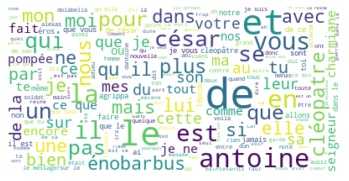

In [239]:
# WordCloud

clean_fr_txt = " ".join(clean_fr)

wordcloud = WordCloud(max_font_size=50, background_color="white").generate(clean_fr_txt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [241]:
# Count unique words

from collections import Counter

c_fr = Counter(clean_fr)

word_counter_fr = pd.DataFrame.from_records(list(dict(c_fr).items()), columns=["Word","Count"])

word_counter_fr.sort_values(by=["Count"])

,Word,Count
2879,linjuste,1
3747,devriez,1
3744,vainquit,1
3743,pharsale,1
3739,ferait,1
...,...,...
112,que,625
57,le,642
40,la,659
24,et,785


In [242]:
word_count_fr = list(word_counter_fr["Count"])

In [243]:
# Calculate word probability

word_prob_fr = []
for i in range(1,len(word_count_fr)):
  word_prob_fr.append(word_count_fr[i]/sum(word_count_fr))

In [244]:
# Word entropy

word_entropy_fr = -sum(word_prob_fr * np.log2(word_prob_fr))
word_entropy_fr

9.587027915658684

In [245]:
# Create DataFrame from words

fr = pd.DataFrame (clean_fr, columns = ["Word"])
fr

,Word
0,
1,ce
2,document
3,est
4,tiré
...,...
34564,du
34565,cinquième
34566,et
34567,dernier


In [246]:
# Add word lengths to DataFrame

fr["Length"]  = fr["Word"].str.len()

In [247]:
# Check for errors

fr.sort_values(by=["Length"]).head(-3)

,Word,Length
0,,0
819,,0
817,,0
815,,0
813,,0
...,...,...
5129,divertissements,15
20088,alternativement,15
2505,prostitueraient,15
733,scrupuleusement,15


In [257]:
# Remove errors

len_count_fr = fr["Length"].value_counts().drop(0)
len_count_fr.sort_index()

1     1574
2     7701
3     5334
4     4985
5     3877
6     3365
7     2901
8     1922
9     1742
10     645
11     264
12     103
13      52
14      18
15      10
16       1
Name: Length, dtype: int64

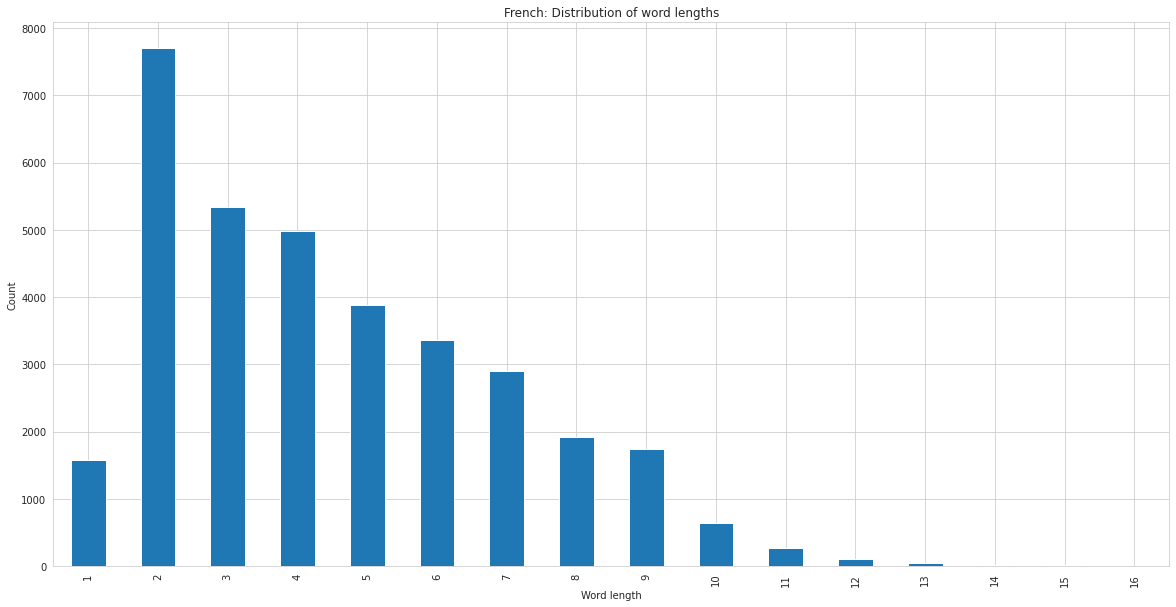

In [258]:
# Distribution of word lengths

plt.figure(figsize=(20,10))
len_count_fr.sort_index().plot(kind="bar")
plt.xlabel("Word length")
plt.ylabel("Count")
plt.title("French: Distribution of word lengths")
plt.show()

In [259]:
# Letter counter

alphabet_fr = ['a','â','à','b','c','ç','d','e','ê','è','é','ë','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
letter_counter_fr = []

for i in range(0,len(alphabet_fr)):
    letter_counter_fr.append(txt_fr.lower().count(alphabet_fr[i]))

In [260]:
# Add letter frequency to new DataFrame

fr2 = pd.DataFrame (alphabet_fr, columns = ["Letter"])
fr2["Frequency"] = letter_counter_fr

fr2

,Letter,Frequency
0,a,11473
1,â,174
2,à,668
3,b,1491
4,c,4841
5,ç,31
6,d,4892
7,e,23392
8,ê,285
9,è,499


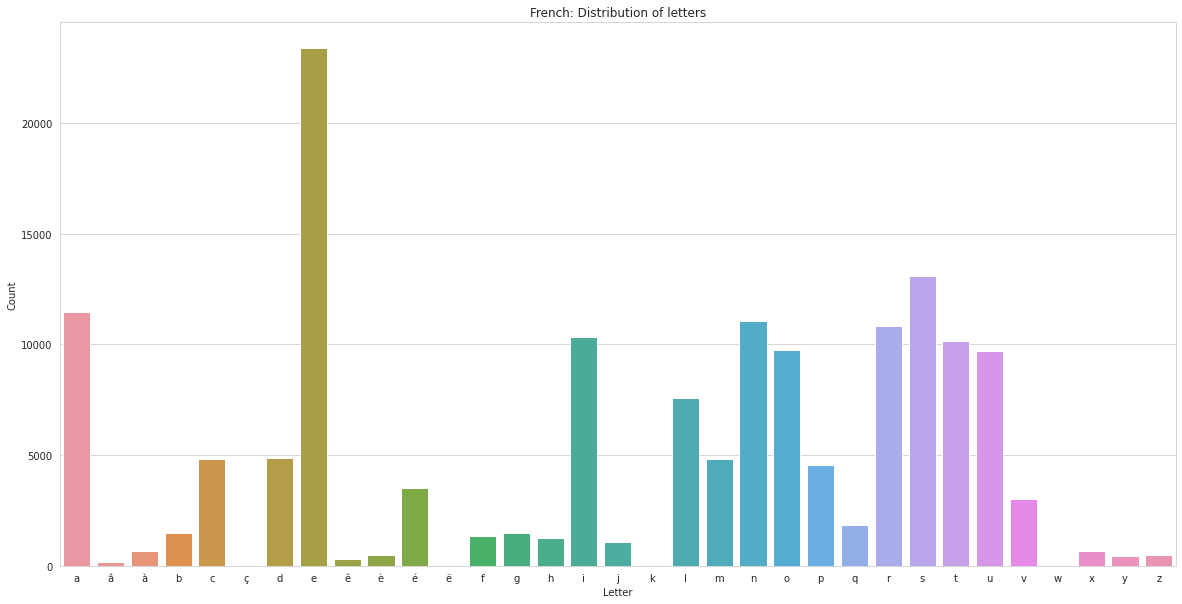

In [261]:
# Distribution of letters

plt.figure(figsize=(20,10))
sns.barplot(x="Letter", y="Frequency", data=fr2)
plt.xlabel("Letter")
plt.ylabel("Count")
plt.title("French: Distribution of letters")
plt.show()

In [262]:
# Calculate letter probability

letter_prob_fr = []
for i in range(0,len(alphabet_fr)):
  letter_prob_fr.append(letter_counter_fr[i] / sum(letter_counter_fr))

In [263]:
# Add letter probability to DataFrame

fr2["Probability"] = letter_prob_fr
fr2

,Letter,Frequency,Probability
0,a,11473,0.074135
1,â,174,0.001124
2,à,668,0.004316
3,b,1491,0.009634
4,c,4841,0.031281
5,ç,31,0.000200
6,d,4892,0.031611
7,e,23392,0.151152
8,ê,285,0.001842
9,è,499,0.003224


In [264]:
# Calculate entropy

entropy_fr = -sum(letter_prob_fr * np.log2(letter_prob_fr))
entropy_fr

4.16805995356944

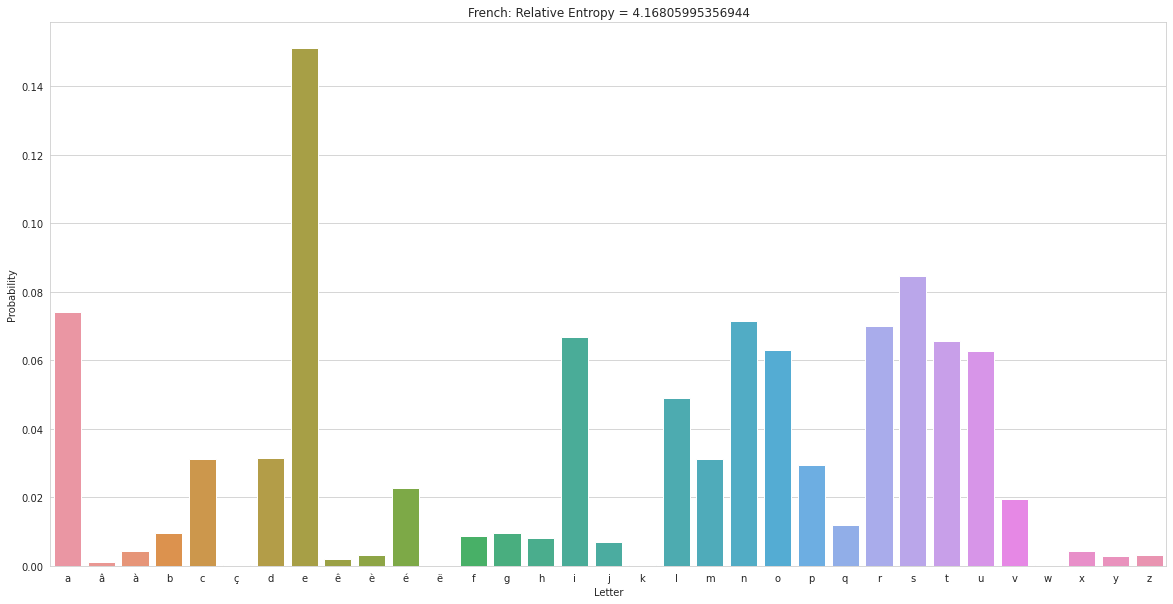

In [265]:
# Letter probability

plt.figure(figsize=(20,10))
sns.barplot(x="Letter", y="Probability", data=fr2)
plt.xlabel("Letter")
plt.ylabel("Probability")
plt.title(f"French: Relative Entropy = {entropy_fr}")
plt.show()

# Entropy of written Finnish

In [390]:
# Get Antonius ja Cleopatra

link_fi = requests.get("https://www.gutenberg.org/cache/epub/16618/pg16618.txt")
raw_fi = link_fi.text
raw_fi[:1000]

'\ufeffThe Project Gutenberg EBook of Antonius ja Cleopatra, by William Shakespeare\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org\r\n\r\n\r\nTitle: Antonius ja Cleopatra\r\n\r\nAuthor: William Shakespeare\r\n\r\nTranslator: Paavo Cajander\r\n\r\nRelease Date: August 29, 2005 [EBook #16618]\r\n\r\nLanguage: Finnish\r\n\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK ANTONIUS JA CLEOPATRA ***\r\n\r\n\r\n\r\n\r\nProduced by Tapio Riikonen\r\n\r\n\r\n\r\n\r\n\r\n\r\nANTONIUS JA CLEOPATRA\r\n\r\nKirj.\r\n\r\nWilliam Shakespeare\r\n\r\n\r\nPaavo Cajanderin suomennos ilmestyi 1895.\r\n\r\n\r\n\r\nNäytelmän henkilöt:\r\n\r\nMARCUS ANTONIUS       |\r\nOCTAVIUS CAESAR       |  triumviireja.\r\nM. AEMILIUS LEPIDUS   |\r\nSEXTUS POMPEJUS,     |\r\nDOMITIUS ENOBARBUS,  |\r\nVENTIDIU

In [391]:
# Check where the English text end

raw_fi[544:1000]

'ANTONIUS JA CLEOPATRA ***\r\n\r\n\r\n\r\n\r\nProduced by Tapio Riikonen\r\n\r\n\r\n\r\n\r\n\r\n\r\nANTONIUS JA CLEOPATRA\r\n\r\nKirj.\r\n\r\nWilliam Shakespeare\r\n\r\n\r\nPaavo Cajanderin suomennos ilmestyi 1895.\r\n\r\n\r\n\r\nNäytelmän henkilöt:\r\n\r\nMARCUS ANTONIUS       |\r\nOCTAVIUS CAESAR       |  triumviireja.\r\nM. AEMILIUS LEPIDUS   |\r\nSEXTUS POMPEJUS,     |\r\nDOMITIUS ENOBARBUS,  |\r\nVENTIDIUS,           |\r\nEROS,                |  Antonion seuralaisia.\r\nSCARUS,              |\r\nDERCETAS,        '

In [392]:
# Check where the English text starts (license info)

raw_fi[-19150:-19000]

"Project Gutenberg's Antonius ja Cleopatra, by William Shakespeare\r\n\r\n*** END OF THIS PROJECT GUTENBERG EBOOK ANTONIUS JA CLEOPATRA ***\r\n\r\n***** This f"

In [435]:
# Remove patterns

txt_fi = regexp.sub(" ", raw_fi[544:-19150])

txt_fi[:1000]

'ANTONIUS JA CLEOPATRA ***          Produced by Tapio Riikonen              ANTONIUS JA CLEOPATRA    Kirj.    William Shakespeare      Paavo Cajanderin suomennos ilmestyi 1895.        Näytelmän henkilöt:    MARCUS ANTONIUS       |  OCTAVIUS CAESAR       |  triumviireja.  M. AEMILIUS LEPIDUS   |  SEXTUS POMPEJUS      |  DOMITIUS ENOBARBUS   |  VENTIDIUS            |  EROS                 |  Antonion seuralaisia.  SCARUS               |  DERCETAS             |  DEMETRIUS            |  PHILO                |  MAECENAS     |  AGRIPPA      |  DOLABELLA    |  Caesarin seuralaisia.  PROCULEJUS   |  THYREUS      |  GALLUS       |  MENAS          |  MENECRATES     |  Pompejon seuralaisia.  VARRIUS        |  TAURUS  Caesarin ylipäällikkö.  CANIDIUS. Antonion ylipäällikkö.  SILIUS  sotaherra Ventidion armeijassa.  EUPHRONIUS  airut.  ALEXAS      |  MARDIANUS   |  Cleopatran palvelijoita.  SELEUCUS    |  DIOMEDES    |  Tietäjä.  Talonpoika.  CLEOPATRA  Egyptin kuningatar.  OCTAVIA  Caesarin sisar 

In [270]:
# Split text into words

words_fi = txt_fi.lower().split()

In [395]:
words_fi[:10]

['antonius',
 'ja',
 'cleopatra',
 '***',
 'produced',
 'by',
 'tapio',
 'riikonen',
 'antonius',
 'ja']

In [394]:
clean_fi = [remove_punc(i) for i in words_fi]

clean_fi[:10]

['antonius',
 'ja',
 'cleopatra',
 '',
 'produced',
 'by',
 'tapio',
 'riikonen',
 'antonius',
 'ja']

In [273]:
print(len(clean_fi))

19004


In [274]:
# Create new DataFrame from words

fi = pd.DataFrame(clean_fi, columns = ["Word"])
fi

,Word
0,antonius
1,ja
2,cleopatra
3,
4,produced
...,...
18999,surujuhlaa
19000,valmistella
19001,menevät
19002,end


In [275]:
# Add word length to DataFrame

fi["Length"] = fi["Word"].str.len()
fi.sort_values(by=["Length"]).head(-3)

,Word,Length
5257,,0
8116,,0
15742,,0
8081,,0
8078,,0
...,...,...
11152,yksityishenkilönä,17
4814,kullankirjaillussa,18
14798,lohikäärmeenmoisen,18
17384,voittosaatossaanko,18


In [276]:
# Word counter by length

len_count_fi = fi["Length"].value_counts().drop(0)
len_count_fi.sort_index()

1        3
2     1848
3     1846
4     2412
5     2634
6     3024
7     2028
8     1694
9     1437
10     715
11     482
12     221
13     102
14      56
15      37
16      22
17      13
18       3
19       2
20       2
Name: Length, dtype: int64

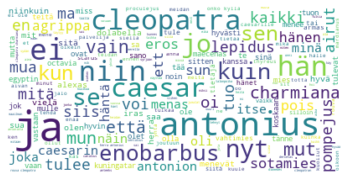

In [277]:
# WordCloud

clean_fi_txt = " ".join(clean_fi)

wordcloud = WordCloud(max_font_size=50, background_color="white").generate(clean_fi_txt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [279]:
# Count unique words

from collections import Counter

c_fi = Counter(clean_fi)

word_counter_fi = pd.DataFrame.from_records(list(dict(c_fi).items()), columns=["Word","Count"])

word_counter_fi.sort_values(by=["Count"])

,Word,Count
3258,mailmaa,1
4307,halpamaisest,1
4305,sopimus,1
4304,nöyrä,1
4303,eksyttää,1
...,...,...
176,ei,250
0,antonius,322
3,,423
142,on,437


In [280]:
word_count_fi = list(word_counter_fi["Count"])

In [281]:
# Calculate word probability

word_prob_fi = []
for i in range(0,len(word_count_fi)):
  word_prob_fi.append(word_count_fi[i]/sum(word_count_fi))

In [282]:
# Word entropy

word_entropy_fi = -sum(word_prob_fi * np.log2(word_prob_fi))
word_entropy_fi

10.696571077659781

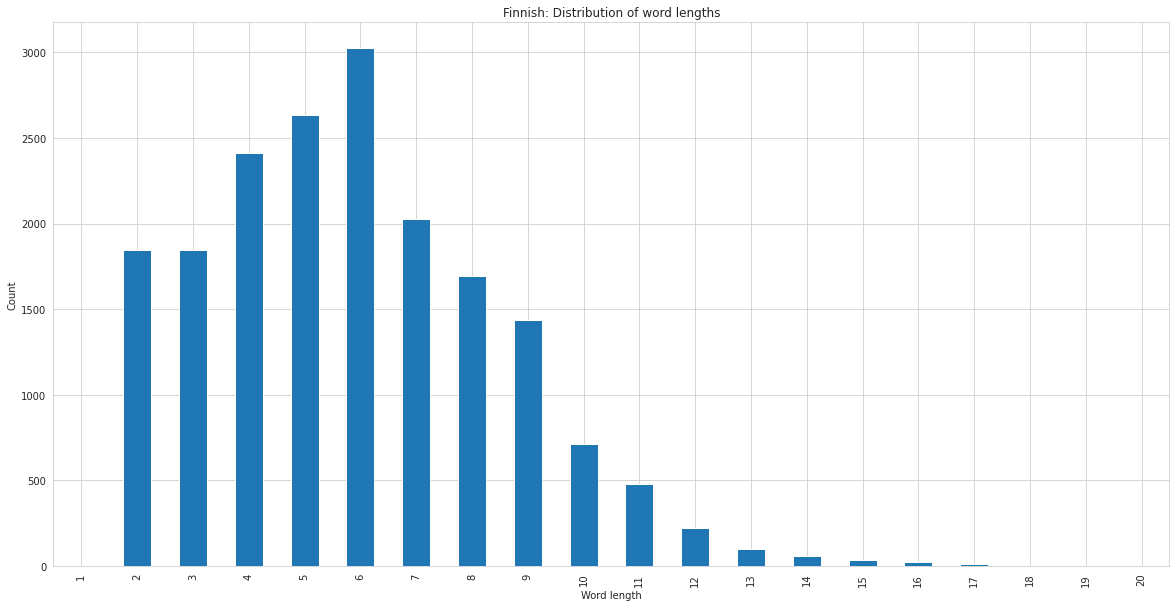

In [283]:
# Distribution of word lengths

plt.figure(figsize=(20,10))
len_count_fi.sort_index().plot(kind="bar")
plt.xlabel("Word length")
plt.ylabel("Count")
plt.title("Finnish: Distribution of word lengths")
plt.show()

In [284]:
# Count letters

alphabet_fi = ['a','ä','b','c','d','e','f','g','h','i','j','k','l','m','n','o','ö','p','r','s','t','u','v','w','x','y','z']

letter_counter_fi = []

for i in range(0,len(alphabet_fi)):
    letter_counter_fi.append(txt_fi.lower().count(alphabet_fi[i]))

In [285]:
# Add letter frequency to a new DataFrame

fi2 = pd.DataFrame (alphabet_fi, columns = ["Letter"])
fi2["Frequency"] = letter_counter_fi

fi2

,Letter,Frequency
0,a,13373
1,ä,4956
2,b,353
3,c,860
4,d,827
5,e,8885
6,f,20
7,g,205
8,h,2600
9,i,10692


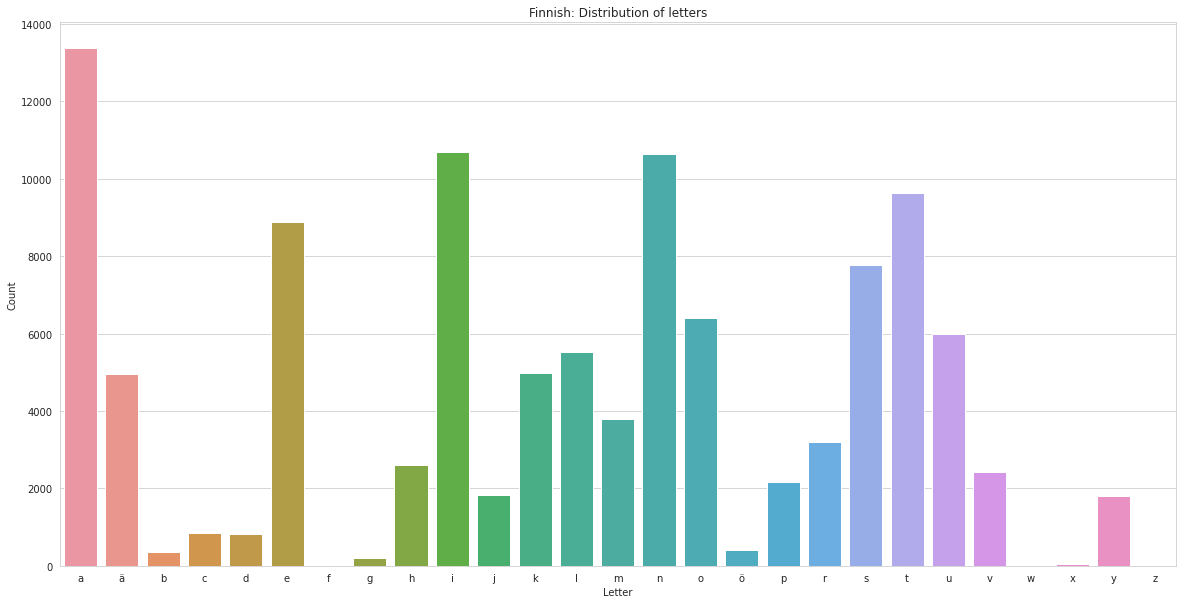

In [286]:
# Distribution of letters

plt.figure(figsize=(20,10))
sns.barplot(x="Letter", y="Frequency", data=fi2)
plt.xlabel("Letter")
plt.ylabel("Count")
plt.title("Finnish: Distribution of letters")
plt.show()

In [289]:
# Calculate letter probability

letter_prob_fi = []
for i in range(0,len(alphabet_fi)):
  letter_prob_fi.append(letter_counter_fi[i]/sum(letter_counter_fi))

In [290]:
# Add probability to DataFrame

fi2["Probability"] = letter_prob_fi
fi2

,Letter,Frequency,Probability
0,a,13373,0.122291
1,ä,4956,0.045321
2,b,353,0.003228
3,c,860,0.007864
4,d,827,0.007563
5,e,8885,0.081250
6,f,20,0.000183
7,g,205,0.001875
8,h,2600,0.023776
9,i,10692,0.097774


In [291]:
entropy_fi = -sum(letter_prob_fi * np.log2(letter_prob_fi))
entropy_fi

4.055769597209643

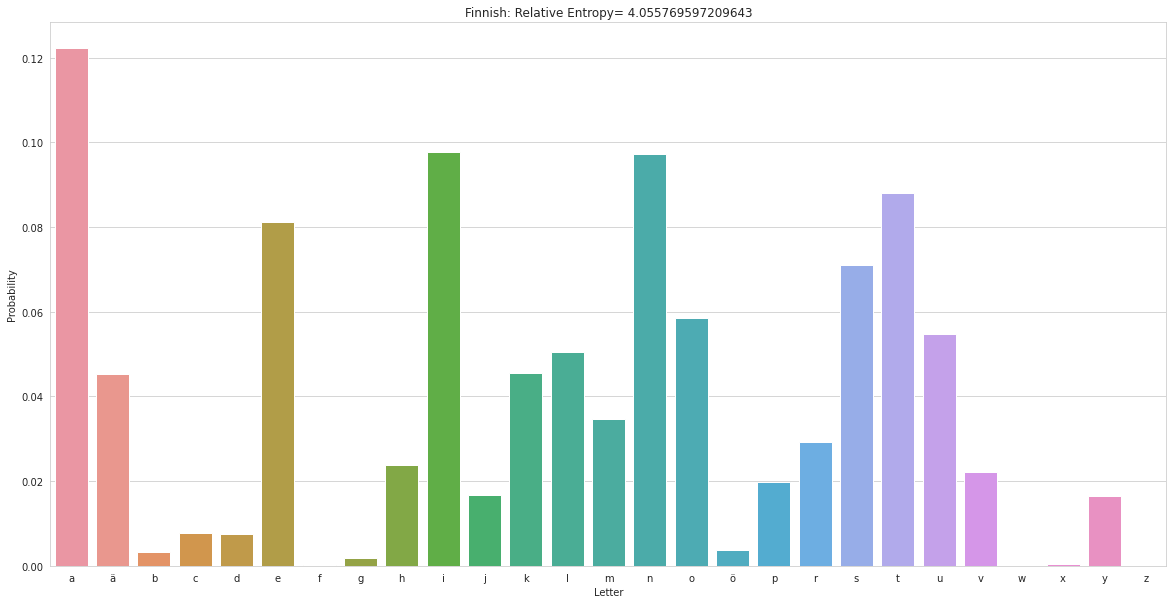

In [292]:
# Letter probability

plt.figure(figsize=(20,10))
sns.barplot(x="Letter", y="Probability", data=fi2)
plt.xlabel("Letter")
plt.ylabel("Probability")
plt.title(f"Finnish: Relative Entropy= {entropy_fi}")
plt.show()

# Impact of translation on entropy

In [398]:
# Get La Maison du Chat-qui-pelote from link

link_balzac = requests.get("https://www.gutenberg.org/cache/epub/24217/pg24217.txt")
raw_balzac = link_balzac.text
raw_balzac[:1000]

"\ufeffProject Gutenberg's La Maison du Chat-qui-pelote, by Honore de Balzac\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org\r\n\r\n\r\nTitle: La Maison du Chat-qui-pelote\r\n\r\nAuthor: Honore de Balzac\r\n\r\nRelease Date: January 7, 2008 [EBook #24217]\r\n\r\nLanguage: French\r\n\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK LA MAISON DU CHAT-QUI-PELOTE ***\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\nHONORE DE BALZAC\r\n\r\nLA COMEDIE HUMAINE\r\n\r\n(EDITION FURNE [1842-1848])\r\n\r\nSCENES DE LA VIE PRIVEE\r\n\r\n\r\nLA MAISON DU CHAT-QUI-PELOTE\r\n\r\nDEDIE A MADEMOISELLE MARIE DE MONTHEAU\r\n\r\nAu milieu de la rue Saint-Denis, presque au coin de la rue du\r\nPetit-Lion, existait naguère une de ces maisons précieuses qui donnent\r\naux historiens la facilité de rec

In [397]:
# Find all English text to be removed

raw_balzac[-19122:-19000]
raw_balzac[542:1000]

"\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\nHONORE DE BALZAC\r\n\r\nLA COMEDIE HUMAINE\r\n\r\n(EDITION FURNE [1842-1848])\r\n\r\nSCENES DE LA VIE PRIVEE\r\n\r\n\r\nLA MAISON DU CHAT-QUI-PELOTE\r\n\r\nDEDIE A MADEMOISELLE MARIE DE MONTHEAU\r\n\r\nAu milieu de la rue Saint-Denis, presque au coin de la rue du\r\nPetit-Lion, existait naguère une de ces maisons précieuses qui donnent\r\naux historiens la facilité de reconstruire par analogie l'ancien Paris.\r\nLes murs menaçants de cette bicoque semblaient avoir"

In [396]:
# Remove patterns

txt_balzac = regexp_ini.sub("'", raw_balzac[542:-19122]) 
txt_balzac[:1000]

"\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\nHONORE DE BALZAC\r\n\r\nLA COMEDIE HUMAINE\r\n\r\n(EDITION FURNE [1842-1848])\r\n\r\nSCENES DE LA VIE PRIVEE\r\n\r\n\r\nLA MAISON DU CHAT-QUI-PELOTE\r\n\r\nDEDIE A MADEMOISELLE MARIE DE MONTHEAU\r\n\r\nAu milieu de la rue Saint-Denis, presque au coin de la rue du\r\nPetit-Lion, existait naguère une de ces maisons précieuses qui donnent\r\naux historiens la facilité de reconstruire par analogie l'ancien Paris.\r\nLes murs menaçants de cette bicoque semblaient avoir été bariolés\r\nd'hiéroglyphes. Quel autre nom le flâneur pouvait-il donner aux X et\r\naux V que traçaient sur la façade les pièces de bois transversales ou\r\ndiagonales dessinées dans le badigeon par de petites lézardes\r\nparallèles ? Evidemment, au passage de toutes les voitures, chacune de\r\nces solives s'agitait dans sa mortaise. Ce vénérable édifice était\r\nsurmonté d'un toit triangulaire dont aucun modèle ne se verra bientôt\r\nplus à Paris. Cette couverture, tordue par 

In [297]:
# Remove patterns

txt_balzac = regexp_fr.sub(" ", txt_balzac)

txt_balzac = regex_aposd.sub(" d'", txt_balzac)
txt_balzac = regex_aposl.sub(" l'", txt_balzac)
txt_balzac = regex_au.sub("qu'a", txt_balzac)
txt_balzac = regex_qua.sub("qu'à", txt_balzac)
txt_balzac = regex_s.sub(" s'", txt_balzac)

In [399]:
# Check text

txt_balzac[:1000]

"\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\nHONORE DE BALZAC\r\n\r\nLA COMEDIE HUMAINE\r\n\r\n(EDITION FURNE [1842-1848])\r\n\r\nSCENES DE LA VIE PRIVEE\r\n\r\n\r\nLA MAISON DU CHAT-QUI-PELOTE\r\n\r\nDEDIE A MADEMOISELLE MARIE DE MONTHEAU\r\n\r\nAu milieu de la rue Saint-Denis, presque au coin de la rue du\r\nPetit-Lion, existait naguère une de ces maisons précieuses qui donnent\r\naux historiens la facilité de reconstruire par analogie l'ancien Paris.\r\nLes murs menaçants de cette bicoque semblaient avoir été bariolés\r\nd'hiéroglyphes. Quel autre nom le flâneur pouvait-il donner aux X et\r\naux V que traçaient sur la façade les pièces de bois transversales ou\r\ndiagonales dessinées dans le badigeon par de petites lézardes\r\nparallèles ? Evidemment, au passage de toutes les voitures, chacune de\r\nces solives s'agitait dans sa mortaise. Ce vénérable édifice était\r\nsurmonté d'un toit triangulaire dont aucun modèle ne se verra bientôt\r\nplus à Paris. Cette couverture, tordue par 

In [299]:
# Split text into words

words_balzac = txt_balzac.lower().split()

In [400]:
words_balzac[:10]

['honore',
 'de',
 'balzac',
 'la',
 'comedie',
 'humaine',
 'edition',
 'furne',
 '[1842',
 '1848]']

In [401]:
# Remove punctuation

clean_balzac = [remove_punc(i) for i in words_balzac]

clean_balzac[:10]

['honore',
 'de',
 'balzac',
 'la',
 'comedie',
 'humaine',
 'edition',
 'furne',
 '',
 '']

In [402]:
print(len(clean_balzac))

21542


In [403]:
# Add words to DataFrame

balzac = pd.DataFrame(clean_balzac, columns = ["Word"])
balzac

,Word
0,honore
1,de
2,balzac
3,la
4,comedie
...,...
21537,est
21538,brûlant
21539,maffliers
21540,octobre


In [404]:
# Add word lengths to DataFrame

balzac["Length"] = balzac["Word"].str.len()
balzac.sort_values(by=["Length"]).head(-10)

,Word,Length
21541,,0
4077,,0
2697,,0
7327,,0
19082,,0
...,...,...
6593,létourdissement,15
20606,contradictoires,15
14146,transfiguration,15
14662,ladministration,15


In [305]:
# Remove errors

len_count_balzac = balzac["Length"].value_counts().drop(0)
len_count_balzac.sort_index()

1      794
2     4796
3     3050
4     2793
5     2332
6     2106
7     1730
8     1411
9     1031
10     518
11     330
12     196
13      70
14      46
15      17
16       6
17       3
Name: Length, dtype: int64

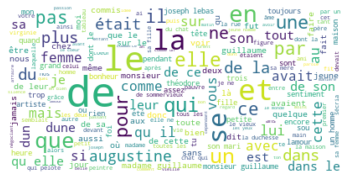

In [306]:
# WordCloud

clean_balzac_txt = " ".join(clean_balzac)

wordcloud = WordCloud(max_font_size=50, background_color="white").generate(clean_balzac_txt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [307]:
# Count unique words

c_balzac = Counter(clean_balzac)

word_counter_balzac = pd.DataFrame.from_records(list(dict(c_balzac).items()), columns=["Word","Count"])

word_count_balzac = list(word_counter_balzac["Count"])

# Calculate word probability

word_prob_balzac = []
for i in range(0,len(word_count_balzac)):
  word_prob_balzac.append(word_count_balzac[i]/sum(word_count_balzac))

# Word entropy

word_entropy_balzac = -sum(word_prob_balzac * np.log2(word_prob_balzac))
word_entropy_balzac

9.593964774702538

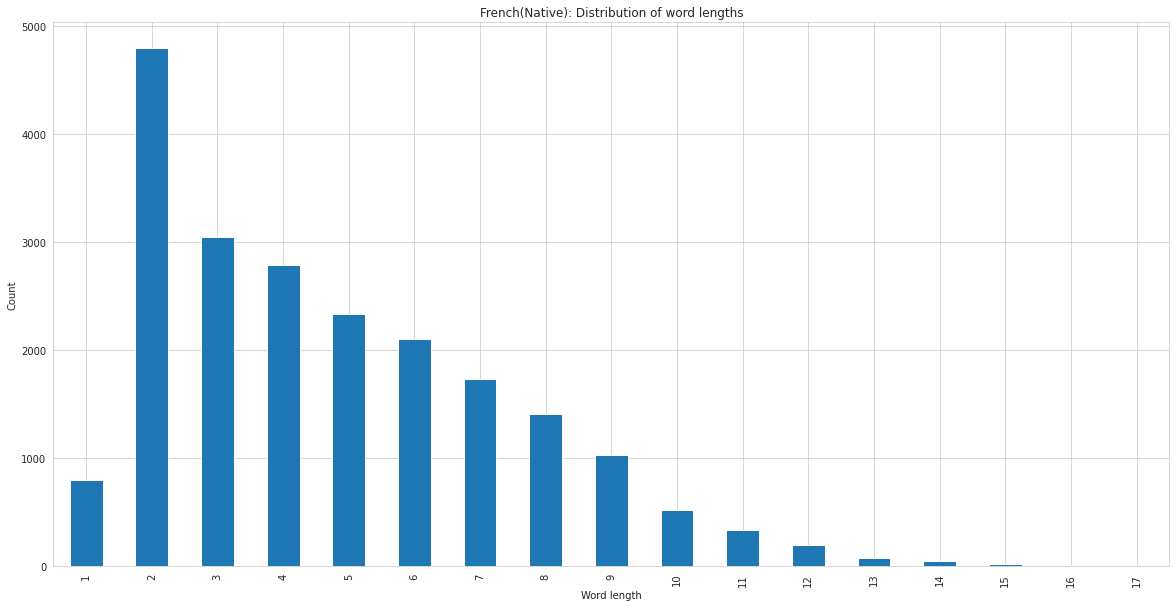

In [308]:
# Distribution of word lengths

plt.figure(figsize=(20,10))
len_count_balzac.sort_index().plot(kind="bar")
plt.xlabel("Word length")
plt.ylabel("Count")
plt.title("French(Native): Distribution of word lengths")
plt.show()

In [309]:
letter_counter_balzac = []

for i in range(0,len(alphabet_fr)):
  letter_counter_balzac.append(txt_balzac.lower().count(alphabet_fr[i]))

In [310]:
balzac2 = pd.DataFrame (alphabet_fr, columns = ["Letter"])
balzac2["Frequency"] = letter_counter_balzac

balzac2

,Letter,Frequency
0,a,8219
1,â,71
2,à,469
3,b,866
4,c,2951
5,ç,63
6,d,3745
7,e,15495
8,ê,172
9,è,365


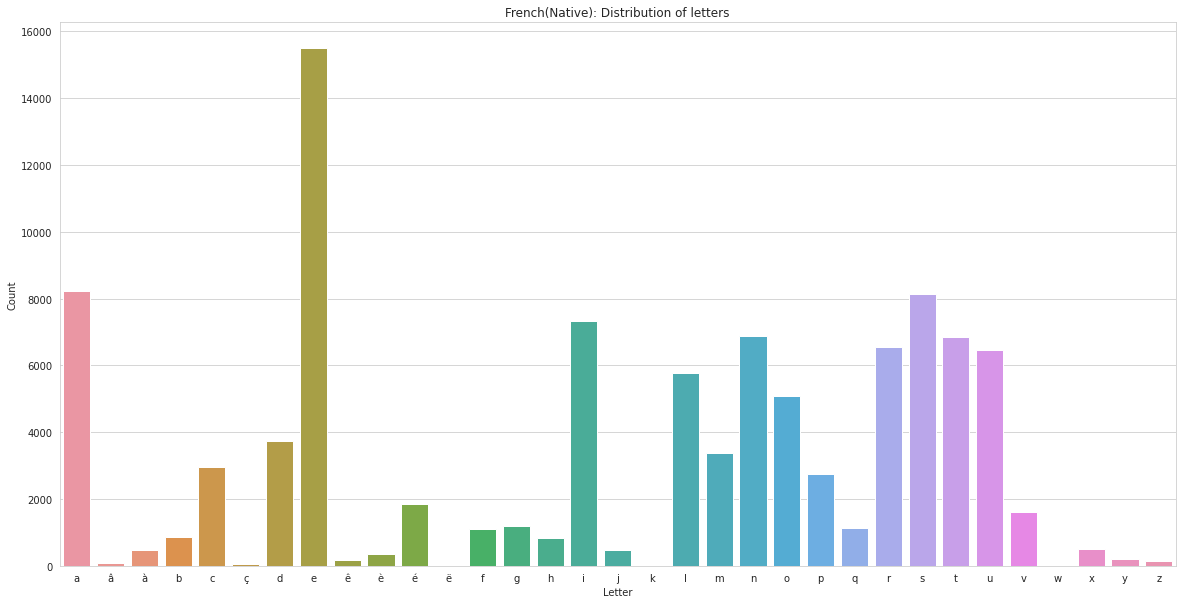

In [311]:
# Distribution of letters

plt.figure(figsize=(20,10))
sns.barplot(x="Letter", y="Frequency", data=balzac2)
plt.xlabel("Letter")
plt.ylabel("Count")
plt.title("French(Native): Distribution of letters")
plt.show()

In [312]:
letter_prob_balzac = []
for i in range(0,len(alphabet_fr)):
  letter_prob_balzac.append(letter_counter_balzac[i] / sum(letter_counter_balzac))

In [313]:
balzac2["Probability"] = letter_prob_balzac
balzac2

,Letter,Frequency,Probability
0,a,8219,0.081674
1,â,71,0.000706
2,à,469,0.004661
3,b,866,0.008606
4,c,2951,0.029325
5,ç,63,0.000626
6,d,3745,0.037215
7,e,15495,0.153977
8,ê,172,0.001709
9,è,365,0.003627


In [314]:
entropy_balzac = -sum(letter_prob_balzac * np.log2(letter_prob_balzac))
entropy_balzac

4.144519409412348

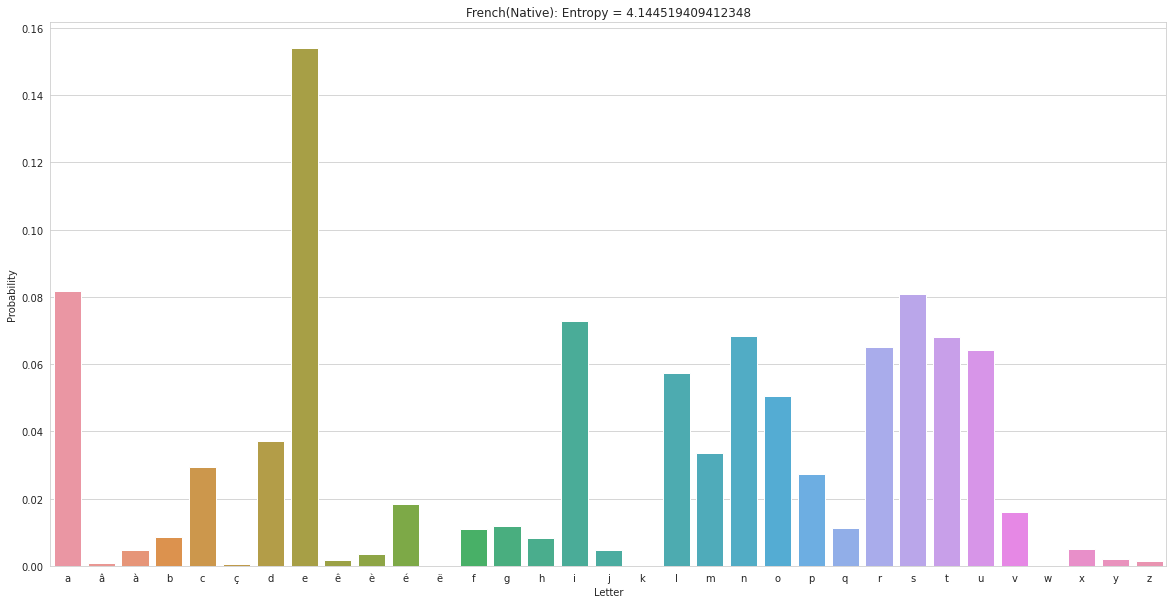

In [315]:
# Letter probability

plt.figure(figsize=(20,10))
sns.barplot(x="Letter", y="Probability", data=balzac2)
plt.xlabel("Letter")
plt.ylabel("Probability")
plt.title(f"French(Native): Entropy = {entropy_balzac}")
plt.show()

# Native Finnish

In [407]:
# Get Helsinkiin

link_aho = requests.get("https://www.gutenberg.org/cache/epub/13580/pg13580.txt")
raw_aho = link_aho.text
raw_aho[:1000]

"\ufeffThe Project Gutenberg EBook of Helsinkiin, by Juhani Aho\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org\r\n\r\n\r\nTitle: Helsinkiin\r\n\r\nAuthor: Juhani Aho\r\n\r\nRelease Date: October 2, 2004 [EBook #13580]\r\n\r\nLanguage: Finnish\r\n\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK HELSINKIIN ***\r\n\r\n\r\n\r\n\r\nProduced by Tapio Riikonen\r\n\r\n\r\n\r\n\r\nHELSINKIIN\r\n\r\nKirj.\r\n\r\nJuhani Aho\r\n\r\n\r\nWSOY, Porvoo, 1920.\r\n\r\n\r\n\r\n\r\nI.\r\n\r\n\r\nKuopion rannassa soivat lähtevien laivain kellot jo toiseen kertaan.\r\n»Elias Lönnrot» oli isoin ja komein laiva, joka vei matkustajia etelään\r\npäin, Helsinkiin ja muuanne, ja sen kello aloitti ensiksi. Sen soidessa\r\nyhtyivät soimaan pienempäin laivain kellot, ja ne helistivät yht'aikaa,\r\nkil

In [406]:
# Find English text to be removed

raw_aho[-19137:-19000]

'End of the Project Gutenberg EBook of Helsinkiin, by Juhani Aho\r\n\r\n*** END OF THIS PROJECT GUTENBERG EBOOK HELSINKIIN ***\r\n\r\n***** This f'

In [414]:
# Find English text to be removed

raw_aho[510:1000]

"Tapio Riikonen\r\n\r\n\r\n\r\n\r\nHELSINKIIN\r\n\r\nKirj.\r\n\r\nJuhani Aho\r\n\r\n\r\nWSOY, Porvoo, 1920.\r\n\r\n\r\n\r\n\r\nI.\r\n\r\n\r\nKuopion rannassa soivat lähtevien laivain kellot jo toiseen kertaan.\r\n»Elias Lönnrot» oli isoin ja komein laiva, joka vei matkustajia etelään\r\npäin, Helsinkiin ja muuanne, ja sen kello aloitti ensiksi. Sen soidessa\r\nyhtyivät soimaan pienempäin laivain kellot, ja ne helistivät yht'aikaa,\r\nkilvan keskenään.\r\n\r\nOli sunnuntai-aamu, jolloin joutilas väki vartavasten tulee rantaan\r\nkatsomaan, "

In [415]:
# Remove patterns

txt_aho = regexp.sub(" ", raw_aho[510:-19137]) 
txt_aho[:1000]

'Tapio Riikonen          HELSINKIIN    Kirj.    Juhani Aho      WSOY  Porvoo  1920.          I.      Kuopion rannassa soivat lähtevien laivain kellot jo toiseen kertaan.  »Elias Lönnrot» oli isoin ja komein laiva  joka vei matkustajia etelään  päin  Helsinkiin ja muuanne  ja sen kello aloitti ensiksi. Sen soidessa  yhtyivät soimaan pienempäin laivain kellot  ja ne helistivät yht aikaa   kilvan keskenään.    Oli sunnuntai-aamu  jolloin joutilas väki vartavasten tulee rantaan  katsomaan  ketä lähtee. He tulevat kiireissään yli satamatorin  ovat  hommassa  niinkuin olisi heillä pelko myöhästymisestä. Laivasillalle  tultua katsellaan tuikeasti ja terävästi  niinkuin olisi asia jotain  tavata. Mutta sitten rauhoitutaan ja asetutaan vähän taammaksi  tarkastamaan niitä  jotka ovat lähtevän näköisiä.    Antti oli ylioppilas. Hän oli suorittanut tutkintonsa mennä kevännä ja  oli nyt lähdössä ensi lukukaudekseen Helsinkiin lukemaan. Hän seisoi  laivasillalla lähellä kulkulautaa. Päässä oli valko

In [416]:
# Split text into words

words_aho = txt_aho.split()

In [436]:
words_aho[:10]

['Tapio',
 'Riikonen',
 'HELSINKIIN',
 'Kirj.',
 'Juhani',
 'Aho',
 'WSOY',
 'Porvoo',
 '1920.',
 'I.']

In [437]:
# Remove punctuation

clean_aho = [remove_punc(i) for i in words_aho]

clean_aho[:10]

['Tapio',
 'Riikonen',
 'HELSINKIIN',
 'Kirj',
 'Juhani',
 'Aho',
 'WSOY',
 'Porvoo',
 '',
 'I']

In [419]:
print(len(clean_aho))

19394


In [420]:
# Add words to DataFrame

aho = pd.DataFrame(clean_aho, columns = ["Word"])

In [421]:
# Add word lenghts to DataFrame

aho["Length"] = aho["Word"].str.len()
aho.sort_values(by=["Length"])

,Word,Length
10693,,0
11892,,0
18571,,0
11664,,0
15613,,0
...,...,...
7468,ylioppilaskirjoituksissa,24
6969,puhtaaksikirjoittamisella,25
7600,tutkintotilaisuuksissakin,25
7406,ylioppilaskirjoituksissakin,27


In [422]:
# Remove errors

len_count_aho = aho["Length"].value_counts().drop(0)
len_count_aho.sort_index()

1        3
2     1764
3     1665
4     2035
5     3090
6     2767
7     1925
8     1889
9     1263
10    1002
11     706
12     503
13     301
14     173
15     109
16      49
17      32
18      17
19      17
20       1
21       3
22       3
23       1
24       3
25       2
27       2
Name: Length, dtype: int64

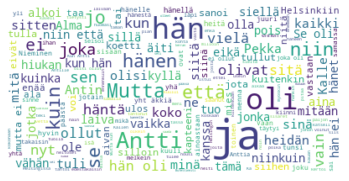

In [423]:
# WordCloud

clean_aho_txt = " ".join(clean_aho)

wordcloud = WordCloud(max_font_size=50, background_color="white").generate(clean_aho_txt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [424]:
# Count unique words

c_aho = Counter(clean_aho)

word_counter_aho = pd.DataFrame.from_records(list(dict(c_aho).items()), columns=["Word","Count"])

word_count_aho = list(word_counter_aho["Count"])

# Calculate word probability

word_prob_aho = []
for i in range(0,len(word_count_aho)):
  word_prob_aho.append(word_count_aho[i]/sum(word_count_aho))

# Word entropy

word_entropy_aho = -sum(word_prob_aho * np.log2(word_prob_aho))
word_entropy_aho

11.187257228119496

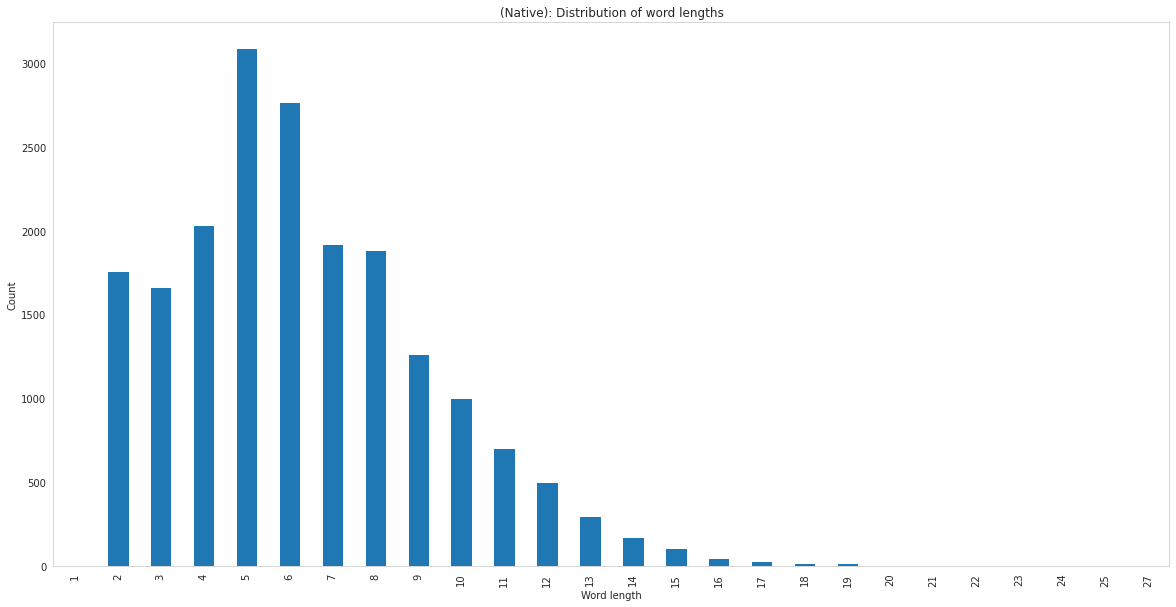

In [425]:
# Distribution of word lengths

plt.figure(figsize=(20,10))
len_count_aho.sort_index().plot(kind="bar")
plt.xlabel("Word length")
plt.ylabel("Count")
plt.title("(Native): Distribution of word lengths")
plt.show()

In [426]:
# Count letters

alphabet_fi = ['a','ä','b','c','d','e','f','g','h','i','j','k','l','m','n','o','ö','p','r','s','t','u','v','w','y','z']

letter_counter_aho = []

for i in range(0,len(alphabet_fi)):
    letter_counter_aho.append(txt_aho.lower().count(alphabet_fi[i]))

In [427]:
# Create new DataFrame from word frequency

aho2 = pd.DataFrame (alphabet_fi, columns = ["Letter"])
aho2["Frequency"] = letter_counter_aho
aho2

,Letter,Frequency
0,a,14797
1,ä,6929
2,b,38
3,c,10
4,d,693
5,e,9348
6,f,49
7,g,126
8,h,3359
9,i,14109


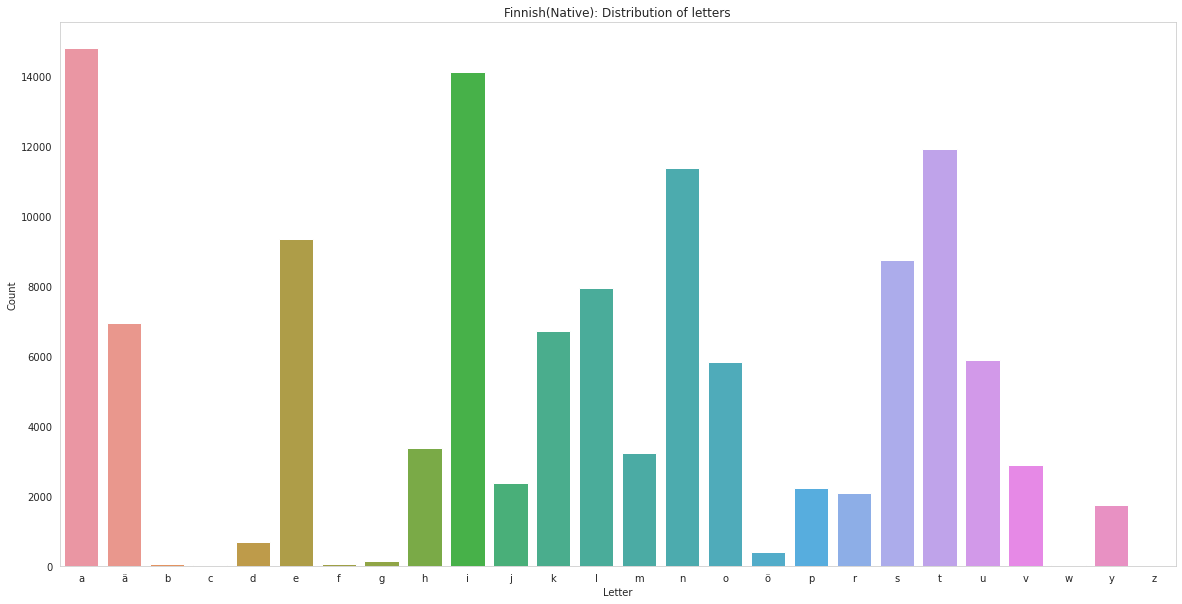

In [428]:
# Distribution of letters

plt.figure(figsize=(20,10))
sns.barplot(x="Letter", y="Frequency", data=aho2)
plt.xlabel("Letter")
plt.ylabel("Count")
plt.title("Finnish(Native): Distribution of letters")
plt.show()

In [429]:
# Calculate letter probability

letter_prob_aho = []
for i in range(0,len(alphabet_fi)):
  letter_prob_aho.append(letter_counter_aho[i]/sum(letter_counter_aho))

In [430]:
# Add probability to DataFrame

aho2["Probability"] = letter_prob_aho

In [431]:
# Calculate relative entropy

entropy_aho = -sum(letter_prob_aho * np.log2(letter_prob_aho))
entropy_aho

3.9606389212680204

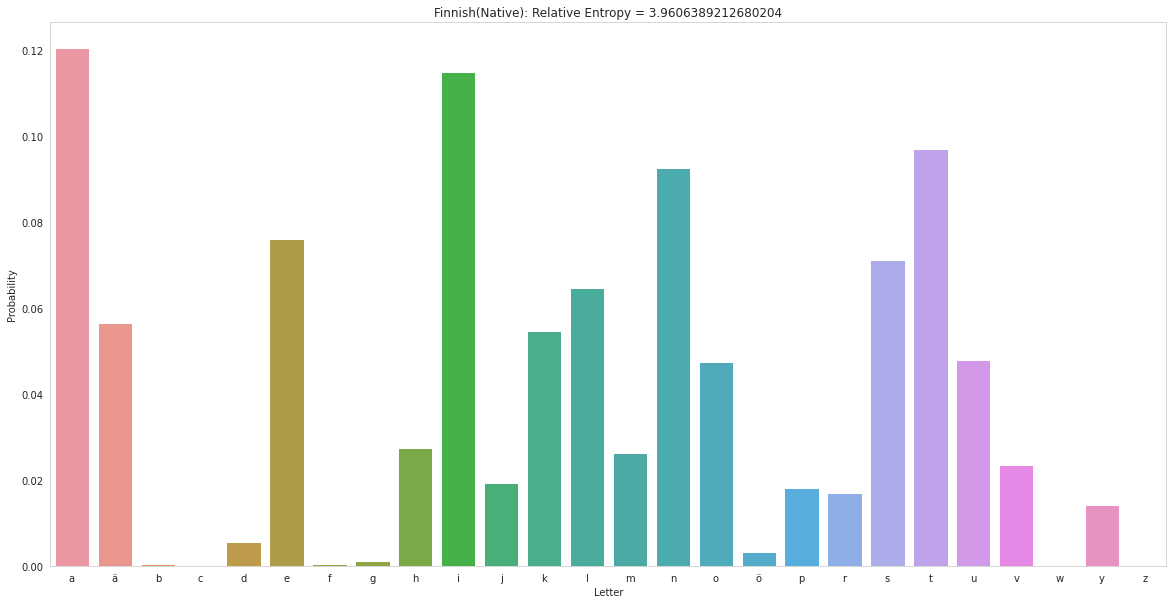

In [432]:
# Letter probability

plt.figure(figsize=(20,10))
sns.barplot(x="Letter", y="Probability", data=aho2)
plt.xlabel("Letter")
plt.ylabel("Probability")
plt.title(f"Finnish(Native): Relative Entropy = {entropy_aho}")
plt.show()

# Entropy comparison

In [433]:
rel_entropy = [entropy_eng ,entropy_fr, entropy_fi]
shan_entropy = [word_entropy_eng, word_entropy_fr, word_entropy_fi]

native_rel = [entropy_eng, entropy_balzac, entropy_aho]
native_shan = [word_entropy_eng, word_entropy_balzac, word_entropy_aho]

x_plot = ["English", "French", "Finnish"]

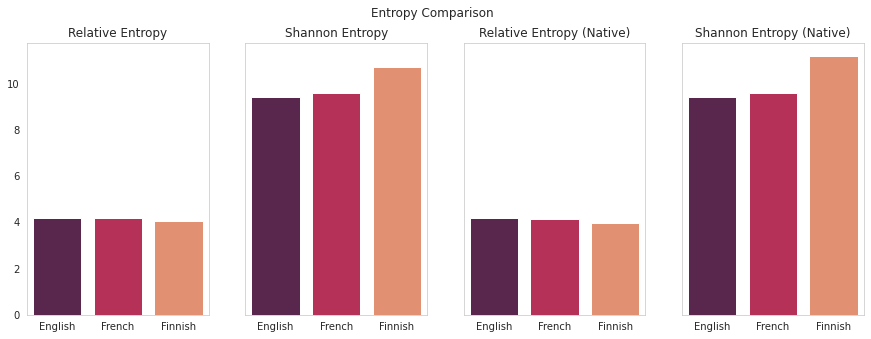

In [434]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
fig.suptitle('Entropy Comparison')

sns.barplot(ax=axes[0], x=x_plot, y=rel_entropy, palette="rocket")
axes[0].set_title("Relative Entropy")

sns.barplot(ax=axes[1], x=x_plot, y=shan_entropy, palette ="rocket")
axes[1].set_title("Shannon Entropy")

sns.barplot(ax=axes[2], x=x_plot, y=native_rel, palette="rocket")
axes[2].set_title("Relative Entropy (Native)")

sns.barplot(ax=axes[3], x=x_plot, y= native_shan, palette="rocket")
axes[3].set_title("Shannon Entropy (Native)")

plt.show()